In [1]:
%pip install deepgram-sdk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import subprocess
from deepgram import Deepgram
import json
import re
import cv2
import matplotlib.pyplot as plt
import math
from ImagesEmotionLucas.scripts.frames_processing import ImageToEmotion
from plotter import Plotter
from text_to_emotion import TextToEmotion

c:\Users\hawky\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# The API key we created in step 3
DEEPGRAM_API_KEY = '4d7ae42383509c771f0de389b766ffbb2f794ca8'

# Replace with your file path and audio mimetype
MIMETYPE = 'audio/mp4'

def video_to_text(video_path):
    # Initializes the Deepgram SDK
    dg_client = Deepgram(DEEPGRAM_API_KEY)
    
    with open(video_path, 'rb') as audio:
        source = {'buffer': audio, 'mimetype': MIMETYPE}
        options = { "punctuate": True, "model": "general", "language": "en-US", "tier": "enhanced", "diarize": True}
    
        print('Requesting transcript...')
        print('Your file may take up to a couple minutes to process.')
        print('While you wait, did you know that Deepgram accepts over 40 audio file formats? Even MP4s.')
        print('To learn more about customizing your transcripts check out developers.deepgram.com')
    
        response = dg_client.transcription.sync_prerecorded(source, options)
        # print(json.dumps(response, indent=4))
        print('Transcript obtained.')
        return response

In [4]:
# video_to_text(r'C:\Users\hawky\university\IA\final\capstone-project\sample_videos\click_cut.mp4')

In [5]:
sentence_regex = re.compile(r'((?<=[.?!]")|((?<=[.?!])(?!")))\s*')

def separate_sentences(text):
    sentences = [x for x in re.split(sentence_regex, text) if len(x) > 0]
    return sentences

In [6]:
def timestamp_sentences(sentences, words):
    word_index = 0
    sentences_timed = []
    for i in range(len(sentences)):
        sent = sentences[i]
        sentence_word_length = len(sent.split())
        word_range = words[word_index : (word_index+sentence_word_length)]
        time_start = word_range[0]['start']
        time_end = word_range[-1]['end']
        sentences_timed.append((sent, time_start, time_end))
        word_index += sentence_word_length
    
    return sentences_timed

In [7]:
def group_sentences(sentences, window_size=10):
    padding_start = [('', sentences[0][1], sentences[0][1])] * (window_size-1)
    padding_end = [('', sentences[-1][2], sentences[-1][2])] * (window_size-1)
    sentences = padding_start + sentences + padding_end
    longer_sentences = []

    for i in range(len(sentences) - window_size + 1):
        sent_group = sentences[i:i + window_size]
        sentence = ' '.join([x[0] for x in sent_group])
        sentence_start = sent_group[0][1]
        sentence_end = sent_group[-1][2]
        longer_sentences.append((sentence.strip(), sentence_start, sentence_end))

    return longer_sentences

In [8]:
def process_transcript(json):
    transcript_data = json['results']['channels'][0]['alternatives'][0]
    transcript = transcript_data['transcript']
    words = transcript_data['words']
    sentences = separate_sentences(transcript)
    sentences = timestamp_sentences(sentences, words)
    sentences = group_sentences(sentences)
    return sentences

In [9]:
def extract_images_from_video(video_path, images_per_second = 0.8):
    video = cv2.VideoCapture(video_path)
    fps = video.get(cv2.CAP_PROP_FPS)
    if fps < 0.1:
        print("VIDEO NOT FOUND")
        return
    
    frames_to_skip = fps / images_per_second
    images = []
    stop = False
    current_frame = 0.0
    while not stop:
        video.set(cv2.CAP_PROP_POS_FRAMES, math.floor(current_frame))
        ret, img = video.read()
        if ret:
            timestamp = current_frame / fps
            images.append((img, timestamp))
            current_frame += frames_to_skip
        else:
            stop = True
    
    return images


In [10]:
# from plotter import Plotter
# from text_to_emotion import TextToEmotion

# tte = TextToEmotion()

# sentences = process_transcript(json_doc)
# text_emotion_scores = tte.sentence_group_to_stats(sentences)

# Plotter.plot_data([], text_emotion_scores)

In [11]:
ite = ImageToEmotion()

def parse_images(images):
    images_parsed = []
    index = 0
    for img, timestamp in images:
        scores, max_label = ite.process_image(img)
        images_parsed.append(
                    {'x': timestamp, 'y': scores, 'image_index': index})
        print("Parsed image {}".format(index))
        index += 1
    
    return images_parsed

Cuda:  False


In [12]:
f = open('sample_response.json')
json_doc = json.load(f)

def parse_video(video_path):
    images = extract_images_from_video(video_path)
    parsed_images = parse_images(images)
    
    tte = TextToEmotion()
    json_transcript = video_to_text(video_path)
    # json_transcript = json_doc
    sentences = process_transcript(json_transcript)
    text_emotion_scores = tte.sentence_group_to_stats(sentences)

    Plotter.plot_data(parsed_images, text_emotion_scores)

Parsed image 0
Parsed image 1
Parsed image 2
Parsed image 3
Parsed image 4
Parsed image 5
Parsed image 6
Parsed image 7
Parsed image 8
Parsed image 9
Parsed image 10
Parsed image 11
Parsed image 12
Parsed image 13
Parsed image 14
Parsed image 15
Parsed image 16
Parsed image 17
Parsed image 18
Parsed image 19
Parsed image 20
Parsed image 21
Parsed image 22
Parsed image 23
Parsed image 24
Parsed image 25
Parsed image 26
Parsed image 27
Parsed image 28
Parsed image 29
Parsed image 30
Parsed image 31
Parsed image 32
Parsed image 33
Parsed image 34
Parsed image 35
Parsed image 36
Parsed image 37
Parsed image 38
Parsed image 39
Parsed image 40
Parsed image 41
Parsed image 42
Parsed image 43
Parsed image 44
Parsed image 45
Parsed image 46
Parsed image 47
Parsed image 48
Parsed image 49
Parsed image 50
Parsed image 51
Parsed image 52
Parsed image 53
Parsed image 54
Parsed image 55
Parsed image 56
Parsed image 57
Parsed image 58
Parsed image 59
Parsed image 60
Parsed image 61
Parsed image 62
Pa

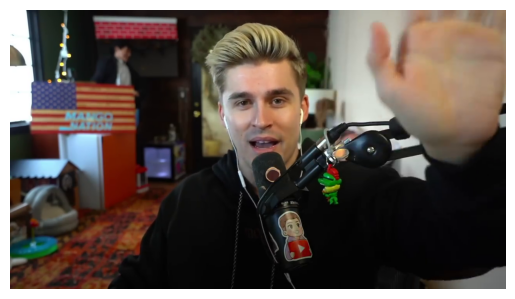

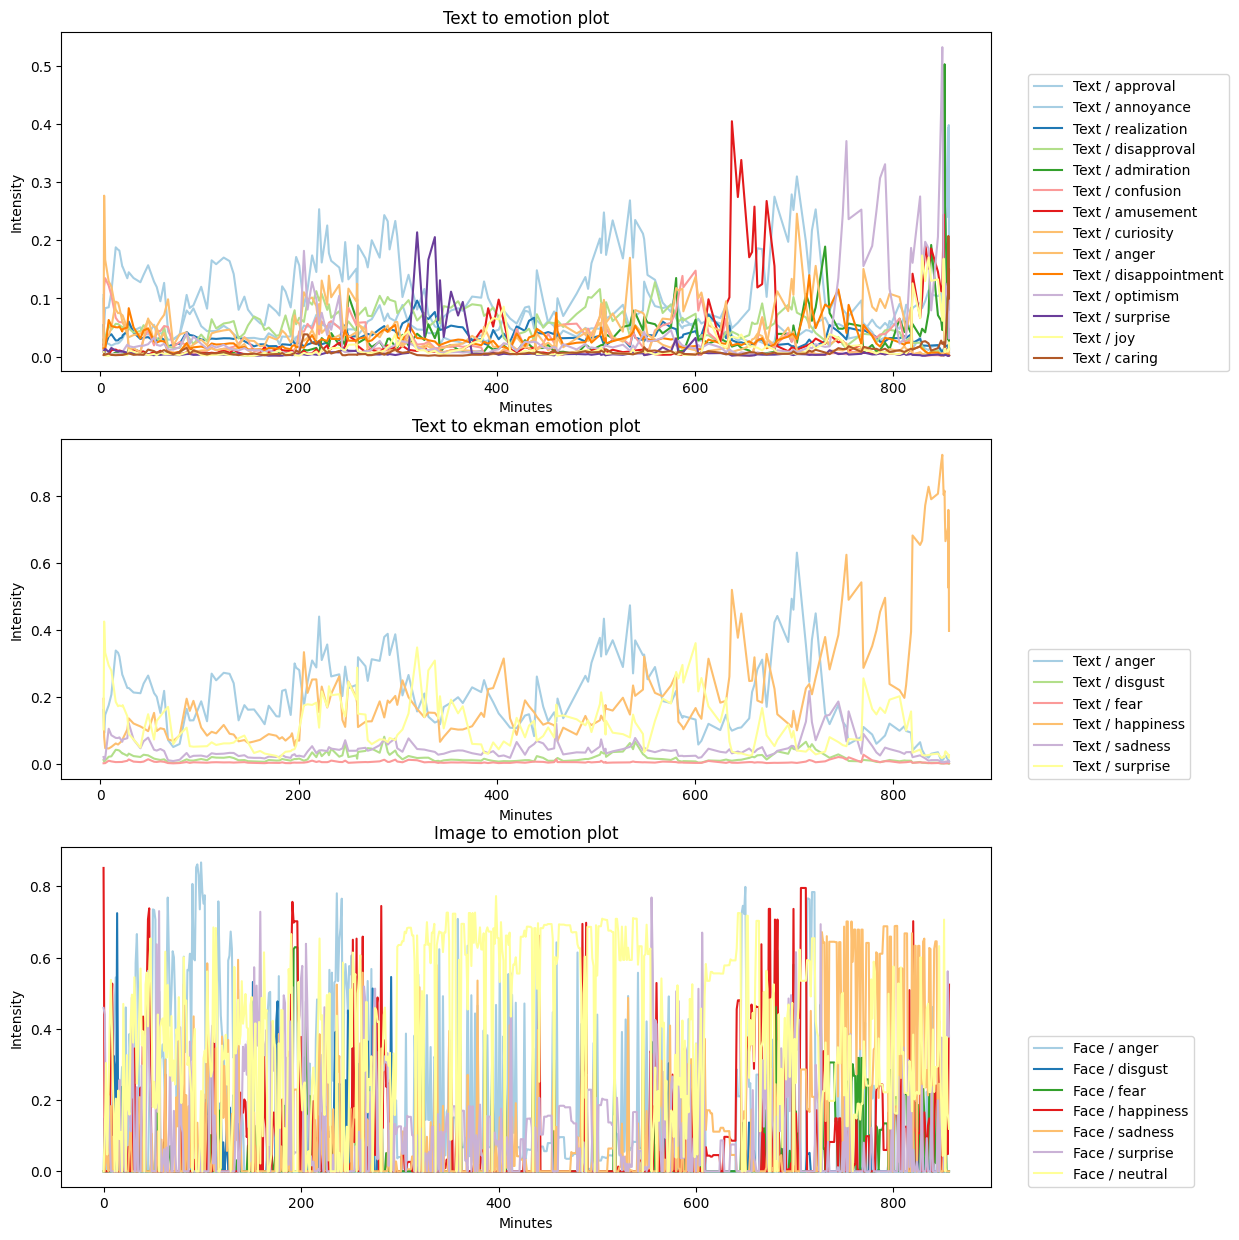

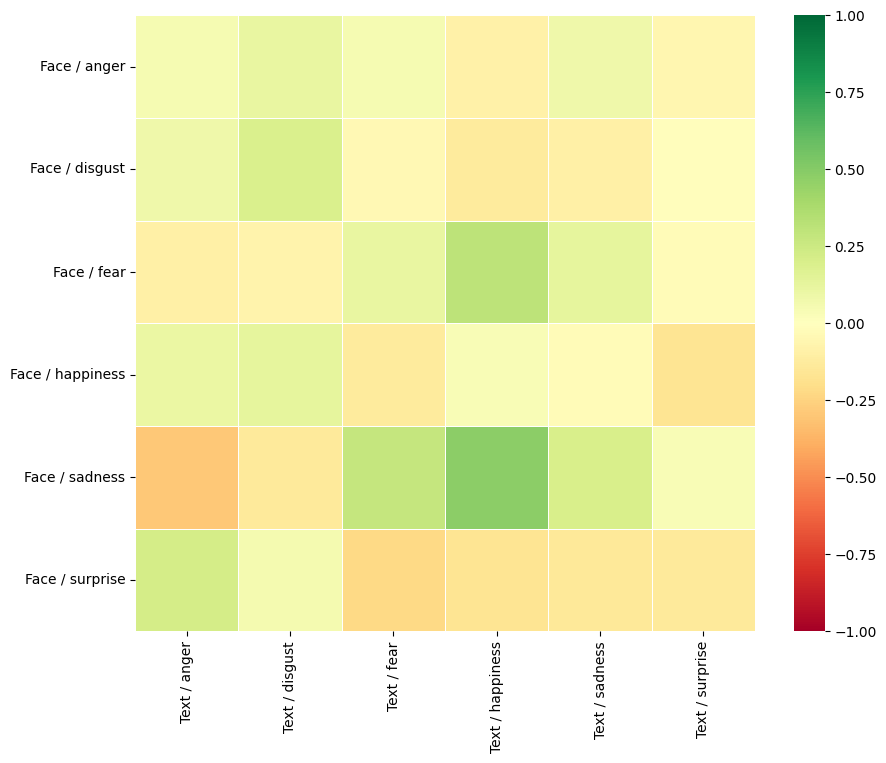

In [13]:
vid_path = r'C:\Users\hawky\university\IA\final\capstone-project\sample_videos\smash_drama.mp4'
parse_video(vid_path)